In [17]:
# Basic Libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plot
import seaborn as sea
from mlxtend.plotting import plot_decision_regions 

# model_selection
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_excel("E:/Internship_project_related/BloodDona/blood-train.xlsx")


In [ ]:
df.shape


<font color=darkviolet>There are 576 rows and 6 columns in the dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


- <font color=red> There are no null columns
- <font color=red> All datas are of int64 data type 

In [21]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


- <font color=darkviolet>The mean number of months since the last donation is 9.44, with a standard deviation of 8.18 months, which indicates that there is some variability in the frequency of donations among donors. The minimum time since the last donation is 0 months, and the maximum is 74 months.</font>

- <font color=darkviolet>On average, each donor made 5.43 donations, with a standard deviation of 5.74 donations. The minimum number of donations is 1, and the maximum is 50. The median number of donations is 4, which suggests that most donors made a relatively small number of donations.</font>

- <font color=darkviolet>The mean total volume donated is 1356.77 cubic centimeters (c.c.), with a standard deviation of 1435.00 c.c. This variable also exhibits a wide range, with the minimum being 250 c.c. and the maximum being 12500 c.c. The median total volume donated is 1000 c.c.</font>

- <font color=darkviolet>The mean number of months since the first donation is 34.05, with a standard deviation of 24.23 months. This variable also shows a wide range, with the minimum being 2 months and the maximum being 98 months.</font>

- <font color=darkviolet>Finally, the data shows that 24% of the donors made a donation in March 2007.</font>


Overall, the data suggests that blood donation is a relatively infrequent activity for most donors, with a large variability in the frequency and volume of donations. However, the fact that almost a quarter of the donors made a donation in March 2007 suggests that there may be opportunities to increase donation rates by engaging with donors and encouraging them to make more frequent donations

In [22]:
df.dtypes

Unnamed: 0                     int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

In [23]:
def trasform_name(x):
    '''Transforms a column name by converting it to lowercase and replacing spaces with underscores.

    Parameters:
    -----------
    x: str
        The name of a column to be transformed.

    Returns:
    --------
    str
        The transformed column name, where all characters are in lowercase and spaces have been replaced with underscores.
    '''
    x=x.lower()
    x=x.replace(' ','_')
    return x

In [15]:
data_cleaned = data.dropna()

In [24]:
column_name = list(df.columns)
column_names = map(lambda x:trasform_name(x),column_name) # 1
df.columns = column_names

In [25]:
df.head()

,unnamed:_0,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [26]:
df.drop('unnamed:_0',inplace=True,axis=1)

In [27]:
df.made_donation_in_march_2007.value_counts()

0    438
1    138
Name: made_donation_in_march_2007, dtype: int64

<font color=darkviolet>The target variable is binary (0 and 1), with a class imbalance where the majority class (0) accounts for 76% of the instances, while the minority class (1) accounts for only 24% of the instances. This class imbalance may pose a challenge in training a predictive model, as the model may be biased towards the majority class.


array([[<AxesSubplot:title={'center':'months_since_last_donation'}>,
        <AxesSubplot:title={'center':'number_of_donations'}>],
       [<AxesSubplot:title={'center':'total_volume_donated_(c.c.)'}>,
        <AxesSubplot:title={'center':'months_since_first_donation'}>],
       [<AxesSubplot:title={'center':'made_donation_in_march_2007'}>,
        <AxesSubplot:>]], dtype=object)

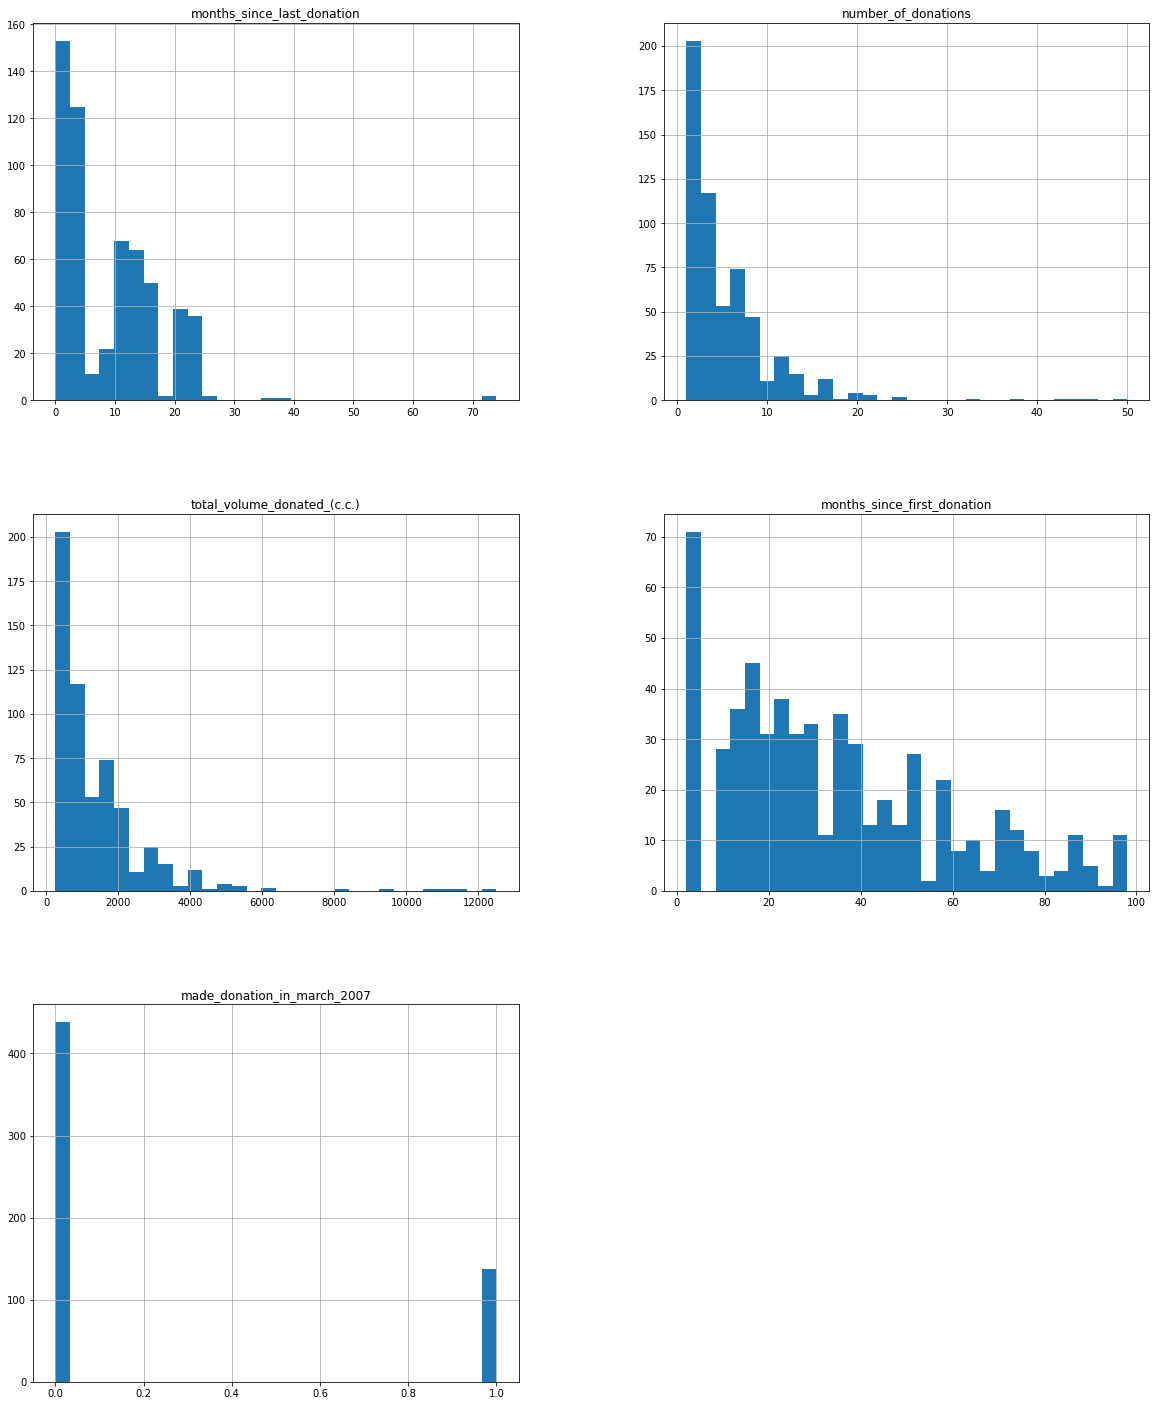

In [29]:
df.hist(bins=30,figsize=(20,25)) #2

- <font color=darkviolet>All of the feature histograms are tail heavy.</font>
- The values of these attributes have a greater distance to the right of the median than to the left, which could pose a challenge for certain Machine Learning algorithms in identifying patterns. Therefore, we will attempt to alter these attributes in the future to create distributions that are more similar to a bell curve.


# Creating Test Set

Setting aside a portion of the data during the initial stages of machine learning may seem counterintuitive. But, relying solely on initial observations can lead to overfitting and data snooping bias. Splitting the data into a training set and testing set early on helps to avoid these risks and leads to a more accurate and effective system. Hence, we will only split train and test set at this point and not the the features and lables.

In [30]:
donor_train,donor_test = train_test_split(df,test_size=0.2,random_state=0)

In [31]:
print('Donors', df.shape)
print('donor_train', donor_train.shape)
print('donor_test', donor_test.shape)

Donors (576, 5)
donor_train (460, 5)
donor_test (116, 5)


In [32]:
train = donor_train
test = donor_test

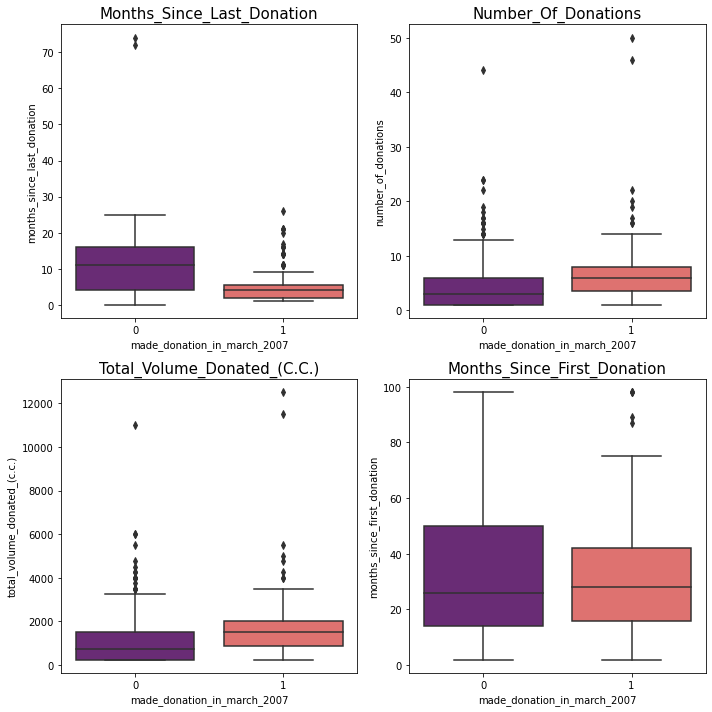

In [33]:
columns= list(train.columns)[:-1]

fig, ax= plot.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    sea.boxplot(y=col, x='made_donation_in_march_2007', data=train, palette='magma', ax=ax)
    ax.set_title(col.title(), fontsize=15);

plot.tight_layout()

- <font color=darkviolet>It observed that the median value of 'Months since Last Donation' is lower for people who donated blood in March 2007. However, it is important to note that there were outliers in the data, with a few donors who had not donated for more than 70 months appearing less likely to donate again in March 2007. 

- <font color=darkviolet>The median number of donations made by donors who donated blood in March 2007 is higher than the median number of donations made by those who did not donate in March 2007. This suggests that donors who donate blood more frequently are more likely to donate again in March 2007. However, there were some donors who had donated more than 30 times in their life but did not donate in March 2007. It is possible that these donors had reasons for not donating, such as health issues or travel plans. It may be helpful to investigate these reasons further to gain a better understanding of why these donors did not donate again in March 2007.

- <font color=darkviolet>Also, the median 'Total Volume Donated (c.c.)' by donors who donated blood in March 2007 is higher than the median 'Total Volume Donated (c.c.)' by those who did not donate in March 2007. This is logical, as donors who have made more donations in the past would have donated a larger total volume of blood. However, there were some donors who had donated around 10,000cc of blood in the past but did not donate in March 2007.

- <font color=darkviolet>From the last histogram, it observed that the median 'Months since First Donation' is almost the same for both classes, but the distribution for class 0 (i.e., donors who did not donate in March 2007) is spread wider than class 1 (i.e., donors who did donate in March 2007). Additionally, the data falling into the interquartile range is also more for class 0.

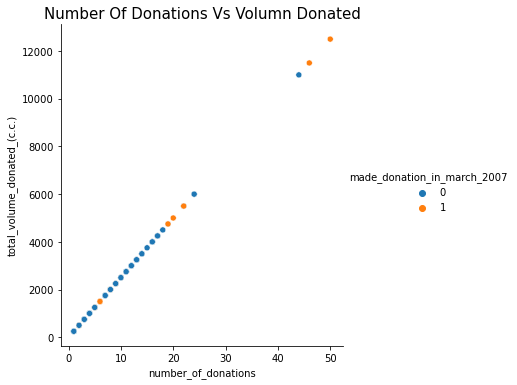

In [34]:
# relation between number of donations vs volumn of blood donated
sea.relplot(x='number_of_donations',y= 'total_volume_donated_(c.c.)', kind='scatter', hue='made_donation_in_march_2007', data=train)
plot.title('Number of donations vs volumn donated'.title(), fontsize=15);

<font color=darkviolet>As thought, number of donations is strongly correlated with volumn of blodd donated by the donor. For each donation, donor donates 250 cc blood.

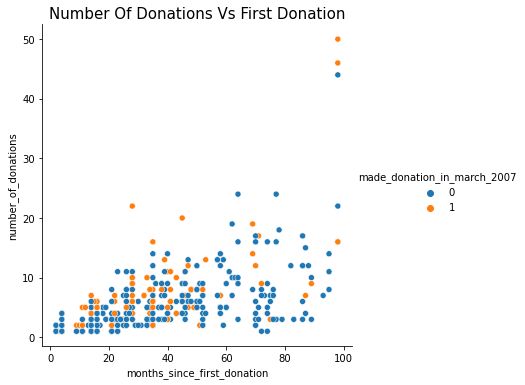

In [35]:
sea.relplot(y='number_of_donations',x= 'months_since_first_donation', kind='scatter', hue='made_donation_in_march_2007', data=train)
plot.title('Number of donations vs First donation'.title(), fontsize=15);

<font color=darkviolet>Number of donations made by donor is also positively correlated with period in months since they first donated. More the time past since first doantion, more the number of danations made by the user.

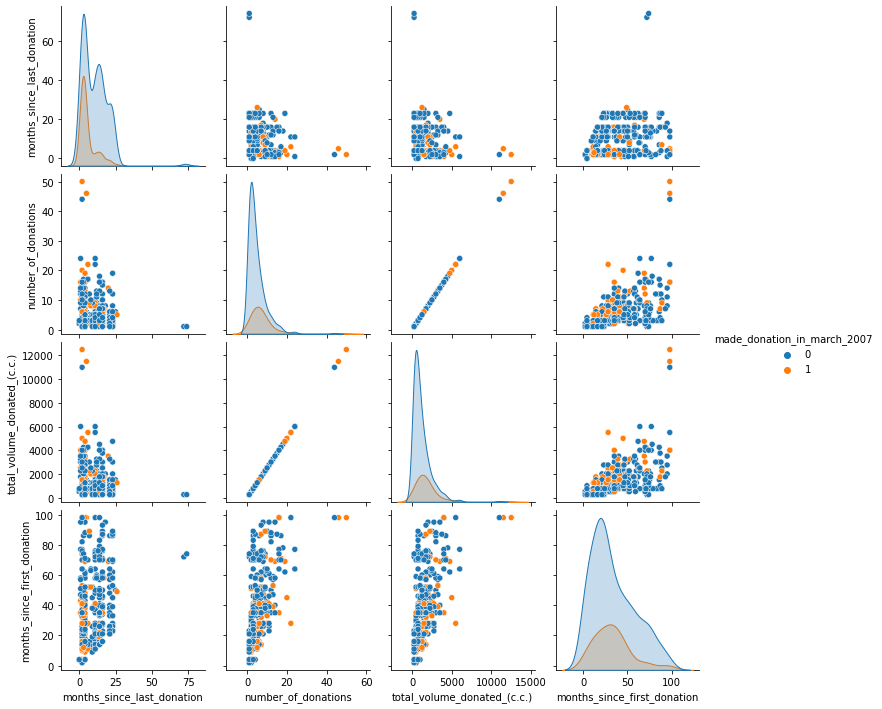

In [36]:
sea.pairplot(train,hue='made_donation_in_march_2007')

- <font color=darkviolet>Since the lesser number of people have donated blood in march 2007, we can see that blue region is overshadowing the organge region in KDE plots.

- <font color=darkviolet>There is no obivous linear relation between months since first doantion and months since last donation.

- <font color=darkviolet>In the last plots, we have already seen that number of donations and volumn of blood donated is strongly correlated. Months since first donation and number of donations also shows positive correlation

- <font color=darkviolet>We will talk more about correlation between variables in the next part

<AxesSubplot:>

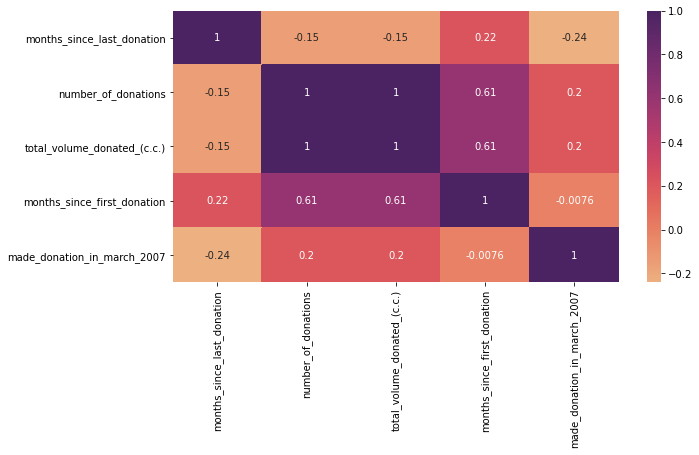

In [37]:
plot.figure(figsize=(10,5))
sea.heatmap(train.corr(),annot=True,cmap='flare')

In [38]:
train.corr()['made_donation_in_march_2007']

months_since_last_donation    -0.240823
number_of_donations            0.202696
total_volume_donated_(c.c.)    0.202696
months_since_first_donation   -0.007590
made_donation_in_march_2007    1.000000
Name: made_donation_in_march_2007, dtype: float64

- <font color=darkviolet>The strongest correlation exists between 'number_of_donations' and 'total_volume_donated_(c.c.)'. This is logical and already expected.

- <font color=darkviolet>There is a negative correlation between 'months_since_last_donation' and 'made_donation_in_march_2007', indicating that donors who have donated more recently are less likely to donate again in March 2007. This aligns with one of the observations you made from the boxplots.

- <font color=darkviolet>There is a very weak positive correlation between 'months_since_first_donation' and 'number_of_donations' as well as 'total_volume_donated_(c.c.)'. This may indicate that donors who have been donating blood for a longer time have donated more frequently and/or have donated larger volumes of blood in total.

# Seeing any null values

In [39]:
train.isna().sum()

months_since_last_donation     0
number_of_donations            0
total_volume_donated_(c.c.)    0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

<font color=darkviolet> There are no null values

# Duplicate Values

In [40]:
train[train.duplicated()]

,months_since_last_donation,number_of_donations,total_volume_donated_(c.c.),months_since_first_donation,made_donation_in_march_2007
356,21,1,250,21,0
347,21,1,250,21,0
357,21,1,250,21,0
140,2,1,250,2,0
172,4,1,250,4,0
...,...,...,...,...,...
174,4,1,250,4,0
314,16,1,250,16,0
472,4,1,250,4,0
70,2,6,1500,28,1


<font color = darkviolet> There are 114 duplicate values in the dataset

#### Possible reasons for duplicated values:

- Data collection errors: Duplicates may occur if data collectors unintentionally recorded the same data twice or if data were merged from different sources without removing the duplicates.

- Technical issues: Technical issues during data collection, storage, or transfer can cause duplicates to appear. For example, a glitch in the system could cause the same data to be recorded multiple times.

- Time-related factors: Duplicates may arise due to changes in data over time, such as a donor's contact information, leading to new data being added while the old data remains in the dataset.

- Data entry errors: Human errors during data entry can lead to duplicates. For example, a data entry clerk may accidentally copy and paste data, resulting in duplicate entries.

- Systematic bias: Duplicates may also arise due to systematic bias in the data collection process, such as over-representation of certain groups or regions, leading to a higher chance of duplications.

#### We have decided to drop the duplicated values for the following reasons:

- To ensure data accuracy: Duplicated rows may lead to inaccurate results, particularly when performing statistical analysis or modeling. Removing duplicates will help ensure that the remaining data is accurate and reliable.

- To reduce bias: If duplicated rows are not removed, they may disproportionately influence the results, leading to biased or incorrect conclusions. Removing duplicates can help reduce this bias.

- To maintain data integrity: Having duplicates in the dataset can lead to confusion and errors, particularly when working with multiple versions of the same data. Removing duplicates can help ensure data integrity and prevent errors.

In [41]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

# Checking Outliers

In [42]:
def find_outliers(col_name):
    """
    Finds the indices of rows where outliers lie in a given column using the IQR method.
    
    Parameters:
    -----------
    col_name : str
        The name of the column for which outliers are to be found.
    
    Returns:
    --------
    list of int or str
        The indices of the rows where outliers are detected or a message indicating no outliers were found.
    """
    
    Q1 = train[col_name].quantile(0.25)
    Q3 = train[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = train[(train[col_name] < lower_bound) | (train[col_name] > upper_bound)].index.tolist()
    
    return outliers

In [43]:
print('Percentage of Outliers in features:')
print('===========================================')
print('months_since_last_donation', np.round(len(find_outliers('months_since_last_donation'))/train.shape[0]*100,2),'%')
print('number_of_donations', np.round(len(find_outliers('number_of_donations'))/train.shape[0]*100,2),'%')
print('total_volume_donated_(c.c.)', np.round(len(find_outliers('total_volume_donated_(c.c.)'))/train.shape[0]*100,2),'%')
print('months_since_first_donation', np.round(len(find_outliers('months_since_first_donation'))/train.shape[0]*100, 2),'%')

Percentage of Outliers in features:
months_since_last_donation 0.59 %
number_of_donations 6.21 %
total_volume_donated_(c.c.) 6.21 %
months_since_first_donation 0.0 %


<font color=darkviolet>The results of the percentage_of_outliers function suggest that there are outliers present in some of the features of the dataset. Specifically, the percentage of outliers for months_since_last_donation is relatively low at 1.16%, whereas the percentage of outliers for number_of_donations and total_volume_donated_(c.c.) is bit higher at 6.21%. On the other hand, there are no outliers detected in the months_since_first_donation feature, which indicates that this feature is relatively well-behaved.

# Challenges and Risks

#### <font color=tomato>Data quality:</font> 
- The quality of data is a crucial factor that affects the model's performance. 
- In this project, if the data is not preprocessed and cleaned properly, it may lead to incorrect results. 
- To mitigate this risk, we have performed data cleaning and preprocessing techniques like removing duplicates, transforming data into normal distibution. We have also performed exploratory data analysis (EDA) to identify the patterns in the data and understand the data distribution.

In [44]:
pwd

'C:\\Users\\vinokarthi\\Practice\\Intern_Project'